# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
#Type your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

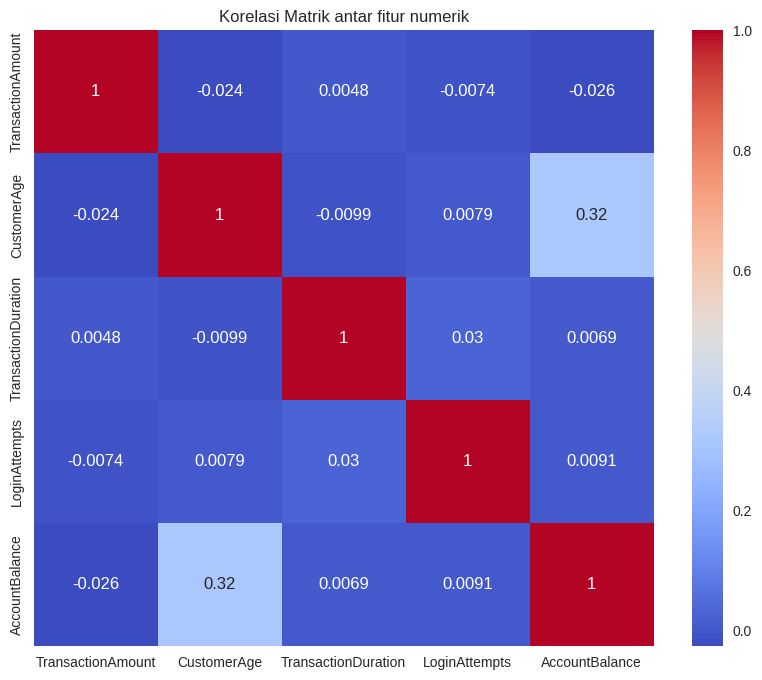

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
#korelasi matrik untuk data numerik
corr_matrix = df.corr(numeric_only=True)

#visualisasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Matrik antar fitur numerik')
plt.show()

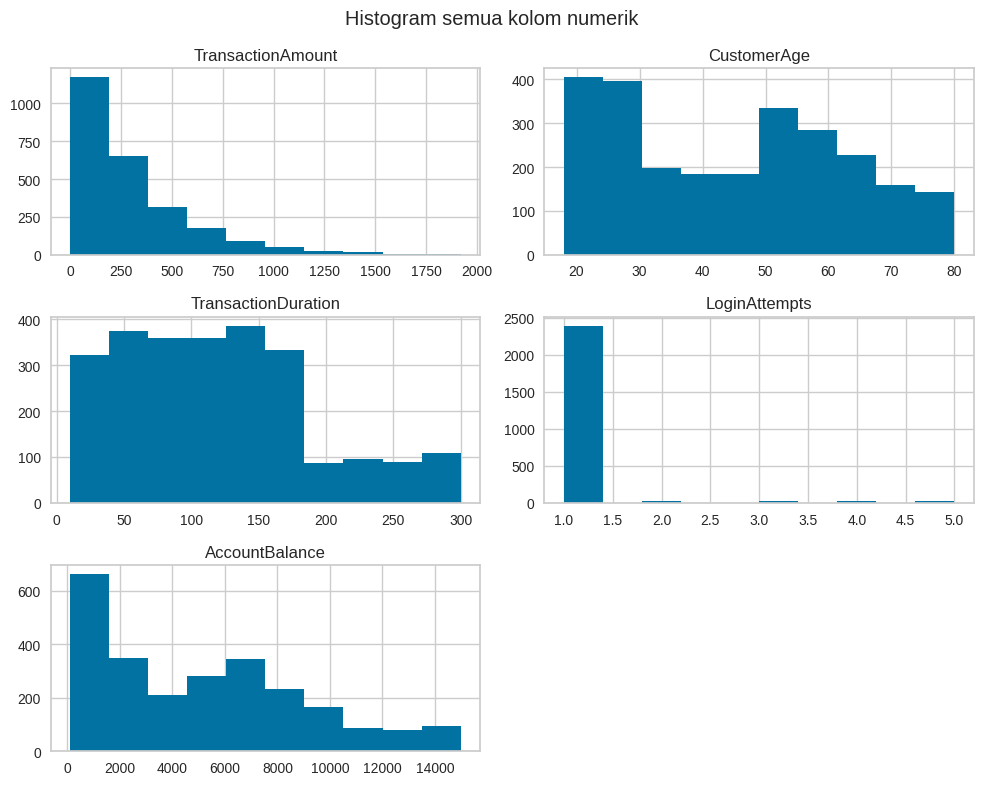

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
#visualisasi semua kolon numerik
df.hist(figsize=(10, 8))
plt.suptitle('Histogram semua kolom numerik')
plt.tight_layout()
plt.show()

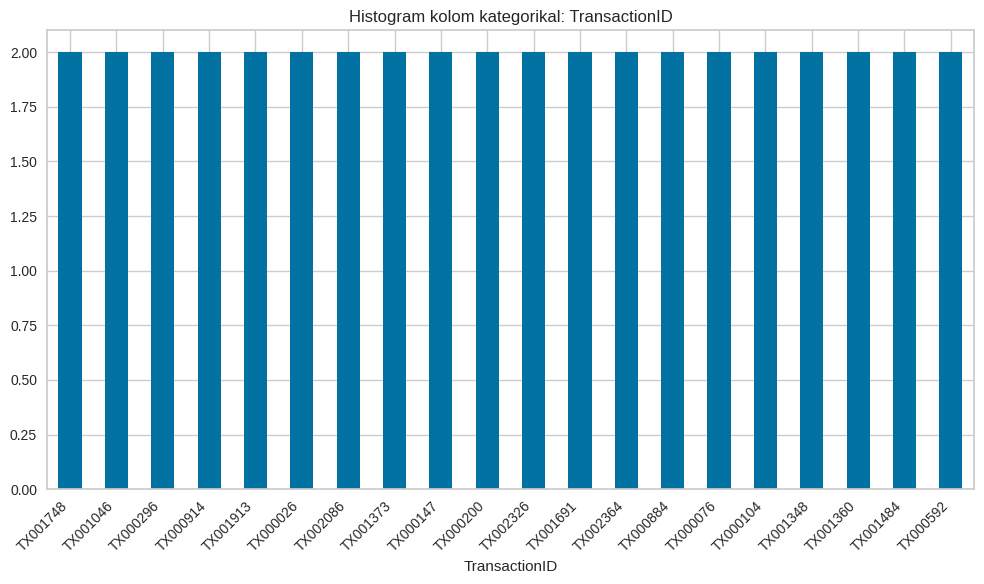

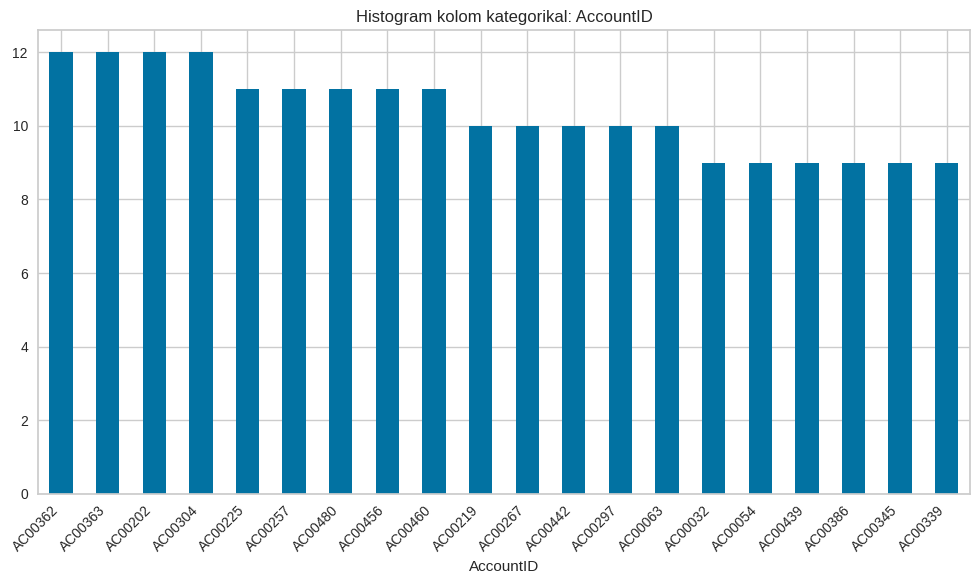

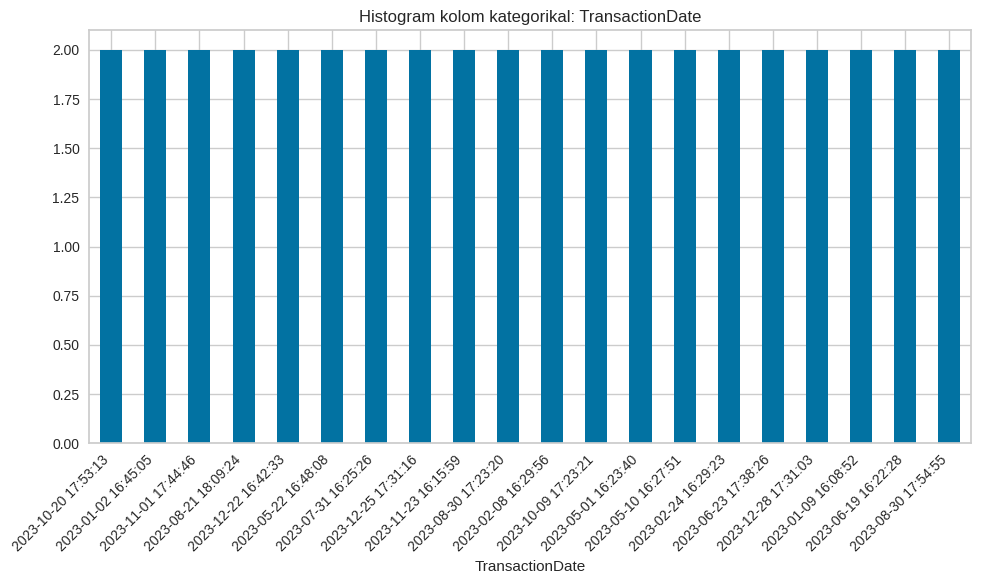

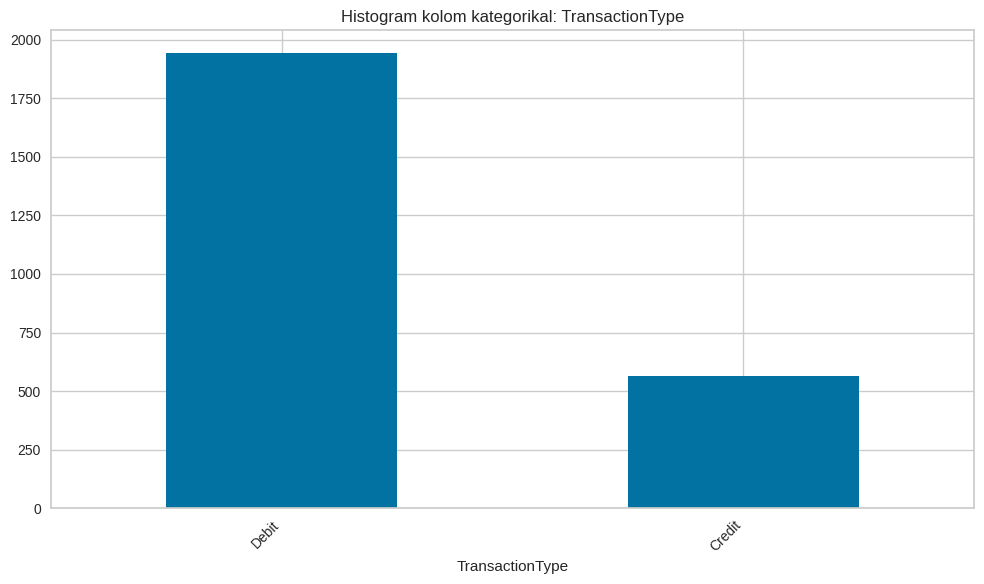

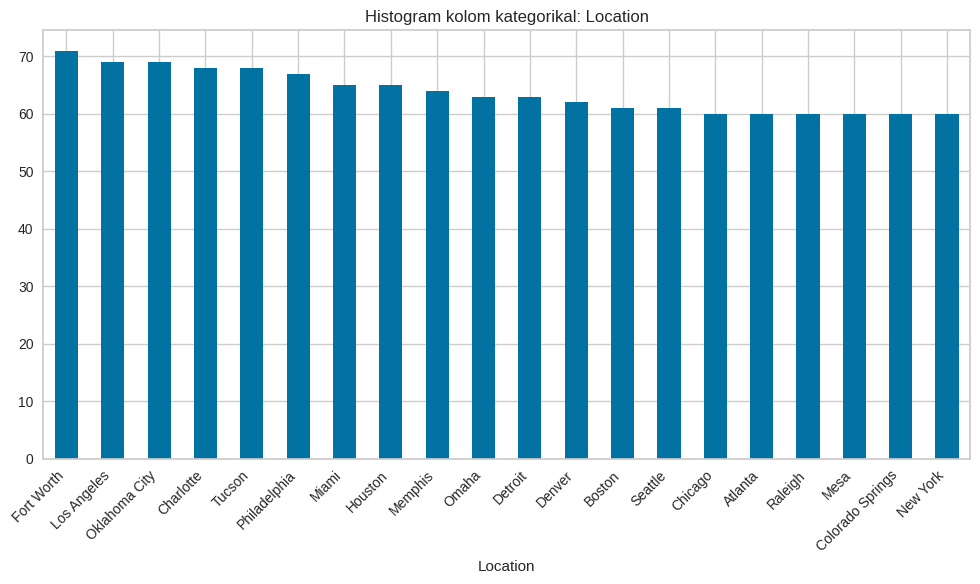

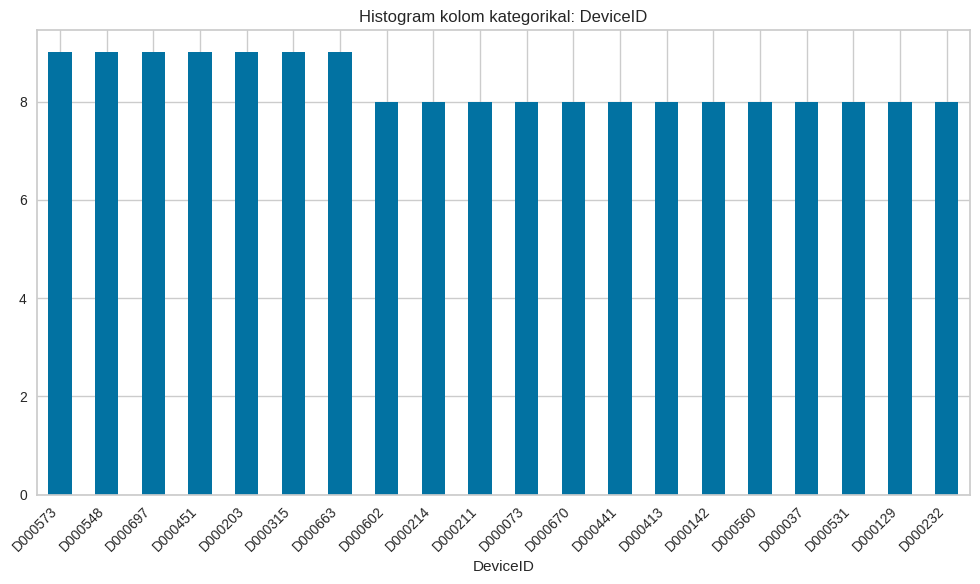

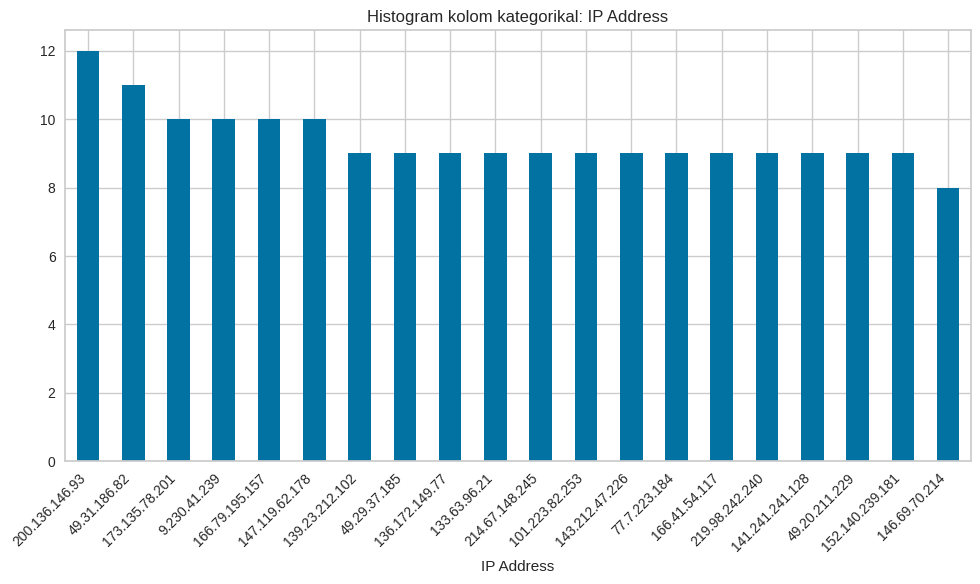

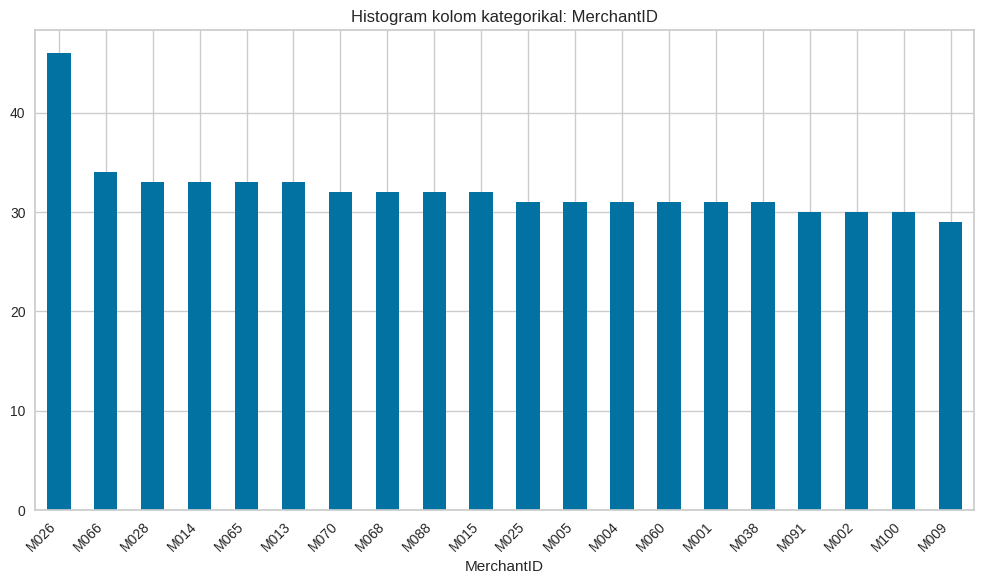

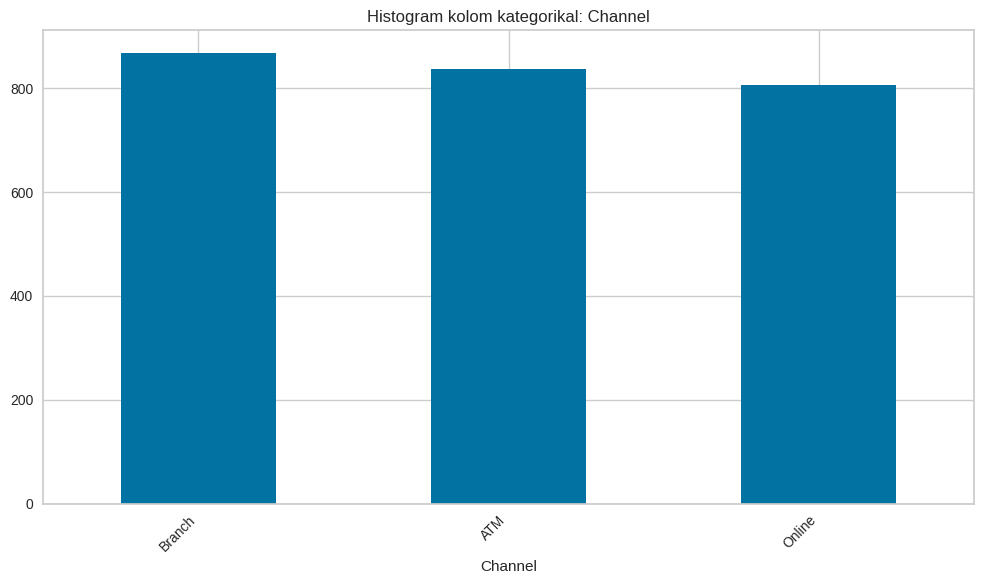

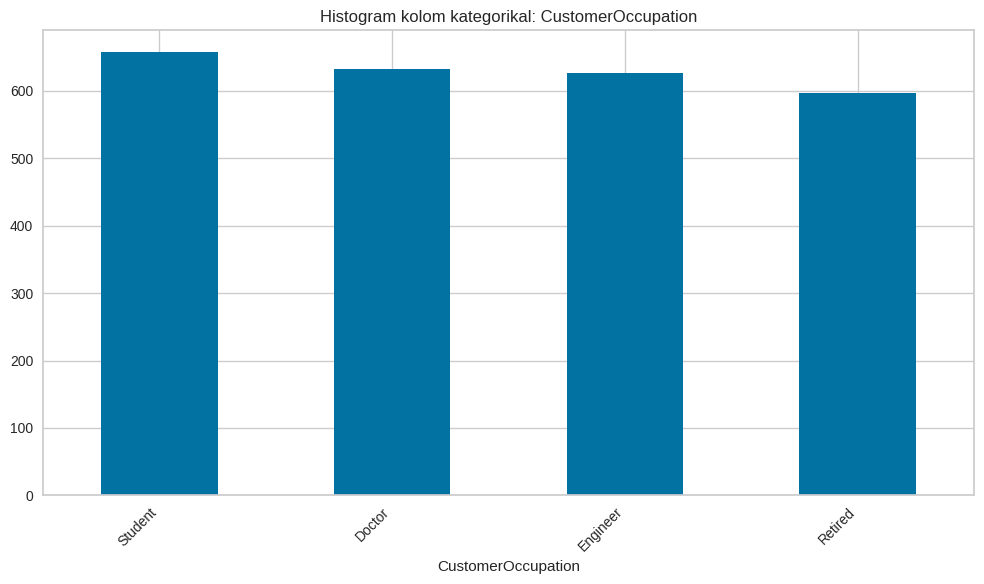

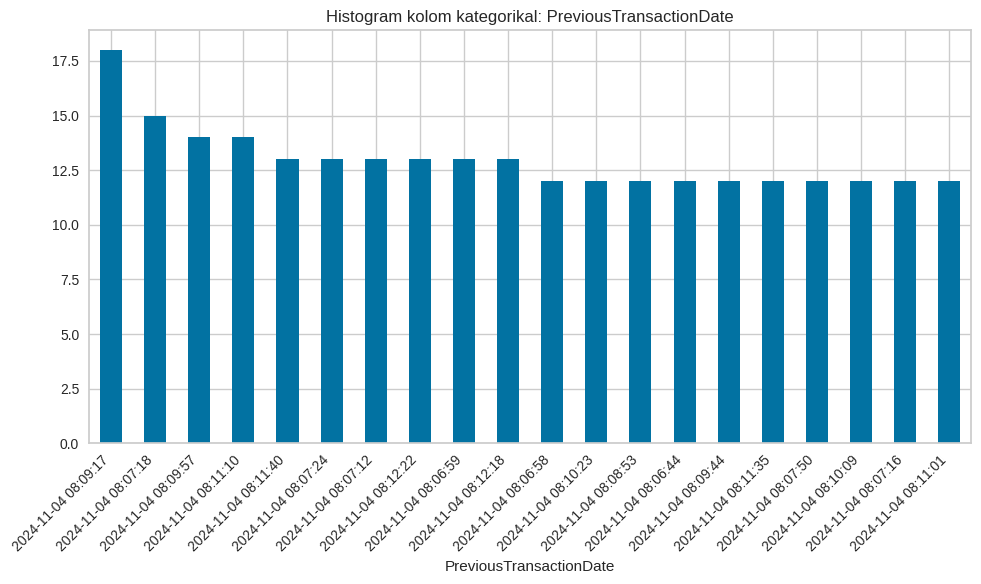

In [ ]:
#menampilkan histogram untuk kolom kategorikal
# Mendapatkan kolom-kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

# Loop untuk membuat histogram untuk setiap kolom kategorikal
for col in categorical_cols:
    plt.figure(figsize=(10, 6))

    # Tampilkan hanya 20 kategori terbanyak
    df[col].value_counts().head(20).plot(kind='bar', title=f'Histogram kolom kategorikal: {col}')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

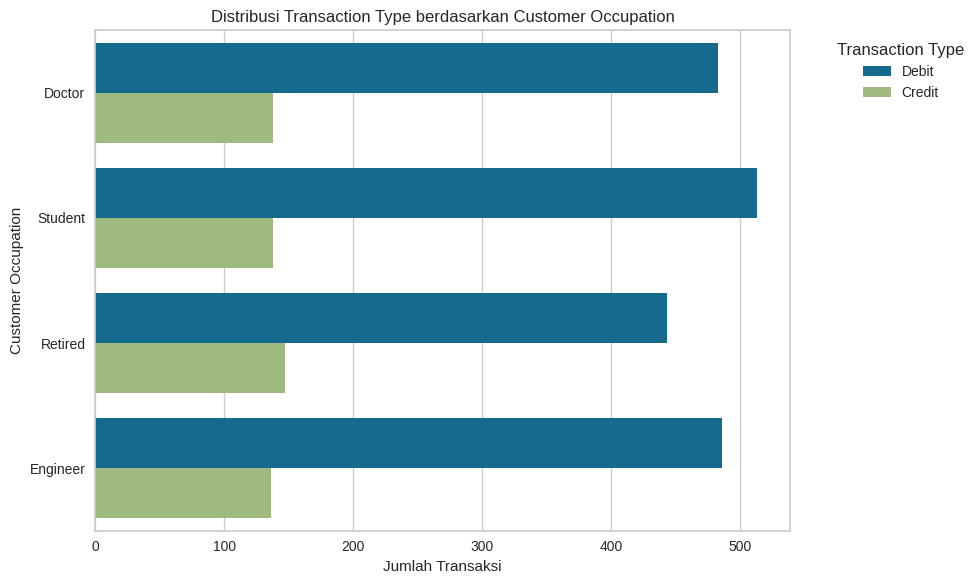

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# untuk hubungan transaction type dengan occupation
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='CustomerOccupation', hue='TransactionType')
plt.title('Distribusi Transaction Type berdasarkan Customer Occupation')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Customer Occupation')
plt.legend(title='Transaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numerical_cols = df.select_dtypes(include=[ 'float64']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'], axis=1)

In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df.select_dtypes(include=['object']).columns
encoders = {}
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  encoders[col] = le
df_encoded = df.copy()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2511 non-null   float64
 1   TransactionDate          2537 non-null   int64  
 2   TransactionType          2537 non-null   int64  
 3   Location                 2537 non-null   int64  
 4   Channel                  2537 non-null   int64  
 5   CustomerAge              2519 non-null   float64
 6   CustomerOccupation       2537 non-null   int64  
 7   TransactionDuration      2511 non-null   float64
 8   LoginAttempts            2516 non-null   float64
 9   AccountBalance           2510 non-null   float64
 10  PreviousTransactionDate  2537 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 218.2 KB


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df_encoded.columns.tolist()


['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
for col in df_encoded.columns:
    if col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())



In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_encoded = df.drop_duplicates()


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Pilih kolom numerik
numerical_cols = df_encoded.select_dtypes(include=['float64']).columns

# Handling outlier dengan clip (winsorizing) pada kolom tertentu
for col in ['TransactionAmount', 'LoginAttempts']:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df_encoded.loc[:, col] = df_encoded[col].clip(lower, upper)




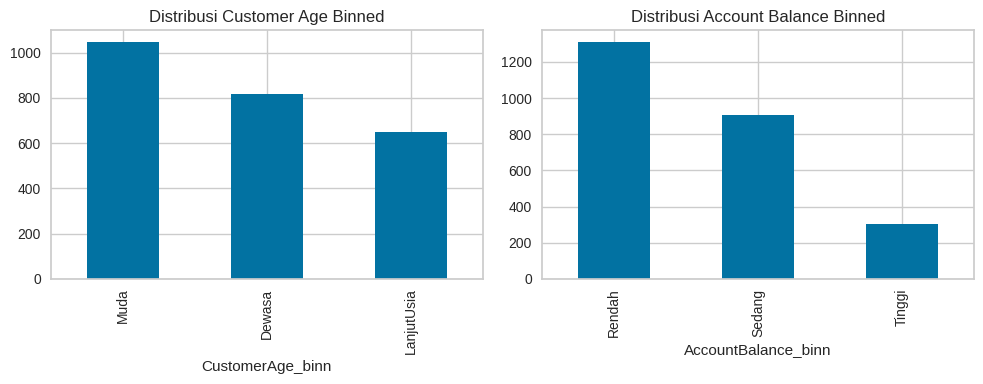

In [400]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.


# Binning CustomerAge
bins_age = [0, 0.33, 0.66, 1.0]
labels_age = ['Muda', 'Dewasa', 'LanjutUsia']
df_encoded.loc[:, 'CustomerAge_binn'] = pd.cut(df_encoded['CustomerAge'],
                                               bins=bins_age,
                                               labels=labels_age,
                                               include_lowest=True)

# Binning AccountBalance
bins_balance = [0, 0.33, 0.66, 1.0]
labels_balance = ['Rendah', 'Sedang', 'Tinggi']
df_encoded.loc[:, 'AccountBalance_binn'] = pd.cut(df_encoded['AccountBalance'],
                                                  bins=bins_balance,
                                                  labels=labels_balance,
                                                  include_lowest=True)

# Encode hasil binning
le = LabelEncoder()
df_encoded.loc[:, 'CustomerAge_binn_encoded'] = le.fit_transform(df_encoded['CustomerAge_binn'])
df_encoded.loc[:, 'AccountBalance_binn_encoded'] = le.fit_transform(df_encoded['AccountBalance_binn'])

# Visualisasi distribusi hasil binning
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
df_encoded['CustomerAge_binn'].value_counts().plot(kind='bar', ax=axs[0], title='Distribusi Customer Age Binned')
df_encoded['AccountBalance_binn'].value_counts().plot(kind='bar', ax=axs[1], title='Distribusi Account Balance Binned')
plt.tight_layout()
plt.show()



# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_encoded.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_binn_encoded,AccountBalance_binn_encoded
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.0,2514.000000,2514.000000,2514.000000,2514.000000
mean,0.147655,1256.328958,0.787987,21.284010,1.01074,0.429415,1.530231,0.377490,0.0,0.336864,180.889021,1.090294,0.599045
std,0.130069,725.581982,0.437042,12.397534,0.83084,0.286157,1.150477,0.240156,0.0,0.260683,103.956287,0.856729,0.692705
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.043213,628.250000,1.000000,11.000000,0.00000,0.145161,0.250000,0.182759,0.0,0.095324,91.250000,0.000000,0.000000
50%,0.110014,1256.500000,1.000000,21.000000,1.00000,0.435484,2.000000,0.351724,0.0,0.311416,181.000000,1.000000,0.000000
75%,0.213328,1884.750000,1.000000,32.000000,2.00000,0.661290,3.000000,0.520690,0.0,0.506870,272.000000,2.000000,1.000000
max,0.468501,2485.000000,2.000000,43.000000,3.00000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000,2.000000,2.000000


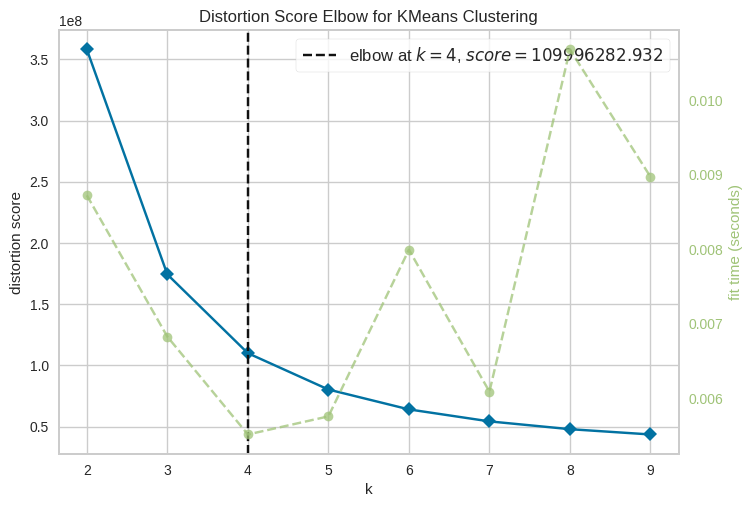

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

# Drop the non-numerical columns before fitting
df_for_clustering = df_encoded.drop(['CustomerAge_binn', 'AccountBalance_binn'], axis=1)

visualizer.fit(df_for_clustering)
visualizer.show()

In [ ]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_for_clustering)

KMeans(n_clusters=4)

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
sil_sore = silhouette_score(df_for_clustering, kmeans.labels_)
print("Silhouette Score:", sil_sore)

Silhouette Score: 0.4986129554742503


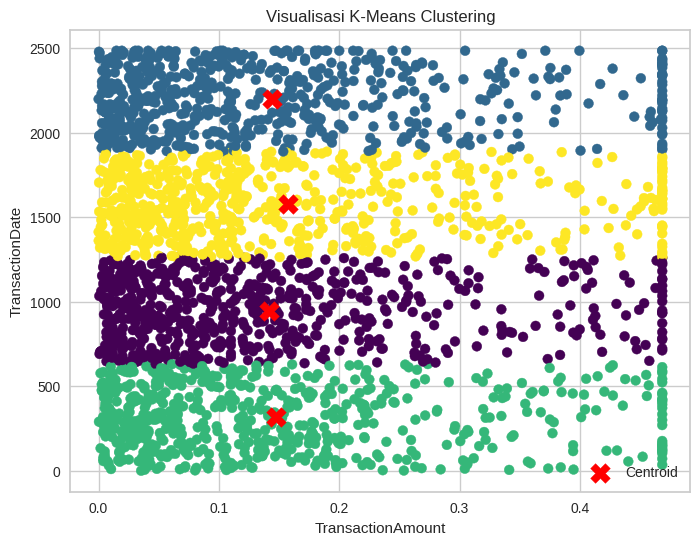

In [ ]:
# Membuat Visualisasi Hasil Clustering
plt.figure(figsize=(8,6))

# Plot titik-titik data
plt.scatter(df_for_clustering.iloc[:, 0], df_for_clustering.iloc[:, 1],
            c=kmeans.labels_, cmap='viridis', s=50)

# Plot centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroid')

plt.title('Visualisasi K-Means Clustering')
plt.xlabel(df_for_clustering.columns[0])
plt.ylabel(df_for_clustering.columns[1])
plt.legend()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.
pca_model =PCA(n_components=4)
data_pca = pca_model.fit_transform(df_for_clustering)

# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
PCA_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=4)
kmeans_pca.fit(PCA_df)


KMeans(n_clusters=4)

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(pca_model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

# Add the cluster labels to the DataFrame
df_for_clustering['Target'] = kmeans.labels_

numeric_features = df_for_clustering.select_dtypes(include='number').columns.drop('Target')
agg_function = ['mean', 'min', 'max']
cluster_stats = df_for_clustering.groupby('Target')[numeric_features].agg(agg_function)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(cluster_stats)

       TransactionAmount                     TransactionDate             TransactionType           Location           Channel         CustomerAge           CustomerOccupation         TransactionDuration                LoginAttempts           AccountBalance                     PreviousTransactionDate          CustomerAge_binn_encoded         AccountBalance_binn_encoded        
                    mean       min       max            mean   min   max            mean min max       mean min max      mean min max        mean  min  max               mean min max                mean  min       max          mean  min  max           mean       min       max                    mean min  max                     mean min max                        mean min max
Target                                                                                                                                                                                                                                            

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah Transaksi Kecil dan Saldo Kecil)**:
  - **Rata-rata (mean) TransactionAmount:** <0.141472> <Setelah inverse>
  - **Rata-rata (mean) AccounBalancet:** <0.331285> <Setelah inverse>
  - **Analisis:**Cluster ini berisi nasabah dengan aktivitas transaksi kecil, namun memiliki saldo paling kecil antara semua cluster.
  Cocok dijadikan target promosi peningkatan aktivitas transaksi.Bisa jadi ini kelompok nasabah baru atau pasif, yang jarang bertransaksi tetapi menyimpan dana cukup besar di akun mereka.
  2. **Cluster 1: (Nasabah Aktif  Stabil dan Saldo cukup tinggi)**:
  - **Rata-rata (mean) TransactionAmount:** <0.144554> <Setelah inverse>
  - **Rata-rata (mean) AccounBalancet:** <0.343506> <Setelah inverse>
  - **Analisis:** Cluster ini menunjukkan nasabah yang aktif dan stabil dalam bertransaksi, dengan saldo relatif tinggi dan konsisten. Mereka memiliki perilaku keuangan sehat dan bisa menjadi target untuk layanan investasi atau tabungan berjangka.
  3. **Cluster 2: (Nasabah Aktivitas Cukup tinggi dan Saldo cukup tinggi)**:
  - **Rata-rata (mean) TransactionAmount:** <0.147186> <Setelah inverse>
  - **Rata-rata (mean) AccounBalancet:** <0.338192> <Setelah inverse>
  - **Analisis:**Cluster ini memiliki rata-rata transaksi yang cukup tinggi dan saldonya juga cukup tinggi, menunjukkan kelompok nasabah dengan tingkat loyalitas dan keaktifan tinggi, yang cenderung melakukan transaksi secara rutin dan mempertahankan saldo dalam jumlah besar.
  4. **Cluster 3: (Nasabah dengan Transaksi tertinggi dan saldo yang Menengah)**:
  - **Rata-rata (mean) TransactionAmount:** <0.157446> <Setelah inverse>
  - **Rata-rata (mean) AccounBalancet:** <0.334504> <Setelah inverse>
  - **Analisis:**Cluster ini adalah nasabah paling aktif bertransaksi, meskipun saldo mereka tidak sebesar Cluster 0 atau 1. Ini menunjukkan nasabah yang dinamis dan sering menggunakan layanan perbankan, cocok dijadikan target program loyalitas atau kredit konsumtif.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_for_clustering['Target'] = kmeans.labels_


In [ ]:
# Simpan Data
df_for_clustering.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
df_for_clustering[numerical_cols] =scaler.inverse_transform(df_for_clustering[numerical_cols])
df_for_clustering_inverse = df_for_clustering.copy()
# tampilkan dataset yang sudah di-inverse
df_for_clustering_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_binn_encoded,AccountBalance_binn_encoded,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,1,1,0
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,1,2,0
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,2,0,0
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,2,1,0
4,13.45,1939,0,1,2,45.0,3,198.0,1.0,7429.40,16,0,1,1


In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col, le in encoders.items():
    df_for_clustering_inverse[col] = le.inverse_transform(df_for_clustering_inverse[col])
df_for_clustering_inverse.head()




,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_binn_encoded,AccountBalance_binn_encoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,1,1,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,1,2,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2,0,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2,1,0
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,0,1,1


In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
# Pastikan hasil cluster sudah ada
df_for_clustering_inverse['Hasil Cluster'] = kmeans.labels_

# Pisahkan kolom numerik dan kategorikal
numeric_features = df_for_clustering_inverse.select_dtypes(include='number').columns.drop('Hasil Cluster', errors='ignore')
categorical_features = df_for_clustering_inverse.select_dtypes(include='object').columns

# --- Analisis deskriptif untuk fitur numerik ---
agg_function = ['mean', 'min', 'max']
cluster_stats_numeric = df_for_clustering_inverse.groupby('Hasil Cluster')[numeric_features].agg(agg_function)

print("=== Analisis Deskriptif Numerik Berdasarkan Cluster ===")
print(cluster_stats_numeric)
print("\n")

# --- Analisis deskriptif untuk fitur kategorikal (mode) ---
cluster_modes = (
    df_for_clustering_inverse.groupby('Hasil Cluster')[categorical_features]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

print("=== Analisis Deskriptif Kategorikal (Mode) Berdasarkan Cluster ===")
print(cluster_modes)



=== Analisis Deskriptif Numerik Berdasarkan Cluster ===
              TransactionAmount                 CustomerAge             TransactionDuration              LoginAttempts           AccountBalance                   CustomerAge_binn_encoded         AccountBalance_binn_encoded         Target        
                           mean   min       max        mean   min   max                mean   min    max          mean  min  max           mean     min       max                     mean min max                        mean min max   mean min max
Hasil Cluster                                                                                                                                                                                                                                        
0                    271.724282  1.41  899.2425   45.068254  18.0  80.0          118.600000  10.0  298.0           1.0  1.0  1.0    5029.688603  106.86  14904.90                 1.096825   0   2            

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah Awal dan Transaksi Rendah)**:
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> <271.7242> dengan rentang 1.41-899.24
   - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <5029.688603>
   - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <45.06>
   - Channel: Branch
   - CustomerOccupation: Student
  - **Analisis:**Cluster ini berisi nasabah dengan nilai transaksi kecil dan saldo relatif rendah. Usia nasabah tergolong dewasa hingga lanjut usia, serta lebih sering bertransaksi langsung di cabang. Pola ini menggambarkan nasabah baru atau pasif yang belum aktif menggunakan layanan perbankan secara intensif.

  2. **Cluster 1: (Nasabah Aktif dan Mapan)**:
 - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> <277.6372> dengan rentang 0.26-899.24
   - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <5211.501808 >
   - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <44.74>
   - Channel: Branch
   - CustomerOccupation: Engineer
  - **Analisis:** Cluster ini menampilkan nasabah yang memiliki saldo tinggi dan transaksi yang stabil. Umumnya berusia sekitar 45 tahun dengan pekerjaan mapan seperti engineer. Aktivitas transaksi dilakukan secara rutin di cabang, menandakan tingkat kepercayaan dan loyalitas tinggi terhadap layanan bank.

   3. **Cluster 2: (Nasabah Lama dan Loyal)**:
 - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> < 282.6916> dengan rentang 0.86-899.24
   - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <5132.444423>
   - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <43.59>
   - Channel: Branch
   - CustomerOccupation: Doctor
  - **Analisis:**Cluster ini menggambarkan nasabah yang sudah lama dan loyal terhadap layanan bank. Mereka memiliki saldo menengah dan pola transaksi stabil. Usia relatif matang dengan profesi profesional seperti dokter. Aktivitas transaksi dominan di cabang dengan frekuensi konsisten.

  
 4. **Cluster 3: (Nasabah Menengah dan Aktivitas Transaksi Tinggi)**:
 - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> <302.376022> dengan rentang 0.32-899.24
   - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <5077.5752405>
   - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <45.09>
   - Channel: ATM
   - CustomerOccupation: Student
  - **Analisis:**Cluster ini berisi nasabah dengan saldo menengah namun aktivitas transaksi tinggi. Mereka umumnya lebih muda dibanding cluster lain dan aktif menggunakan ATM untuk transaksi. Meskipun saldo tidak sebesar nasabah mapan, kelompok ini menunjukkan potensi pertumbuhan yang tinggi di masa depan.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_for_clustering_inverse['Target'] = df_for_clustering['Target']

In [ ]:
# Simpan Data
df_for_clustering_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.